# Problem 1

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [3]:
data = pd.read_csv("train.csv")
print(data.shape)

(1460, 81)


In [4]:
prob1 = data[["GrLivArea", "SalePrice"]]
print("shape: ", data.shape, "\n")
print(prob1.describe())

shape:  (1460, 81) 

         GrLivArea      SalePrice
count  1460.000000    1460.000000
mean   1515.463699  180921.195890
std     525.480383   79442.502883
min     334.000000   34900.000000
25%    1129.500000  129975.000000
50%    1464.000000  163000.000000
75%    1776.750000  214000.000000
max    5642.000000  755000.000000


In [5]:
# Extract Variables as Dataframe

x = data[["GrLivArea"]]
y = data[["SalePrice"]]

# a) Splitting data set in 80:20 ratio randomly

In [154]:
# Split the Dataset into Train and Test randomly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

linreg.fit(x_train, y_train)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (1168, 1)
y_train shape : (1168, 1)
x_test shape : (292, 1)
y_test shape : (292, 1)


# Co-efficient of regression lines and plotting of line of train set


Intercept of Regression 	: b =  [23972.64805294]
Coefficients of Regression 	: a =  [[103.64022562]]


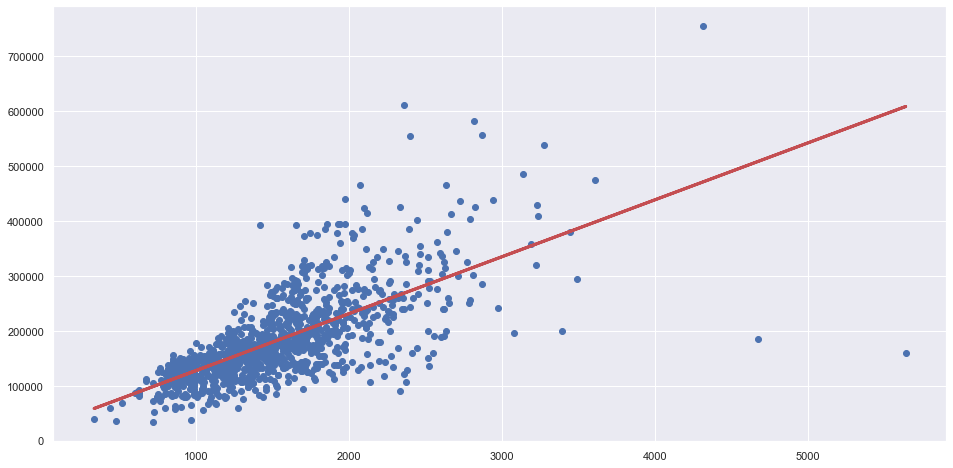

In [155]:
# Formula for the Regression line

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

regline_x = x_train
regline_y = linreg.intercept_ + linreg.coef_ * x_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Plotting of line of test set

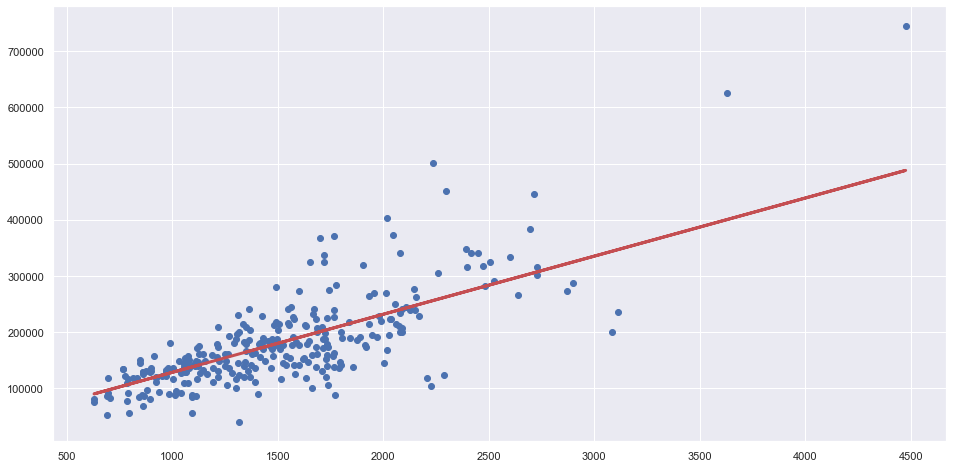

In [156]:
y_test_pred = linreg.predict(x_test)


regline_x_pred = x_test
regline_y_pred = linreg.intercept_ + linreg.coef_ * x_test

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(x_test, y_test)
plt.plot(regline_x_pred, regline_y_pred, 'r-', linewidth = 3)
plt.show()


# b) Metrics to check goodness of fit on test set

In [157]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# TEST SET

y_test_pred = linreg.predict(x_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.480625615646771
Mean Squared Error (MSE) 	: 9167184390.89335

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5742558533100233
Mean Squared Error (MSE) 	: 3009226880.03921
Root Mean Squared Error (MSE) 	: 54856.42059084069



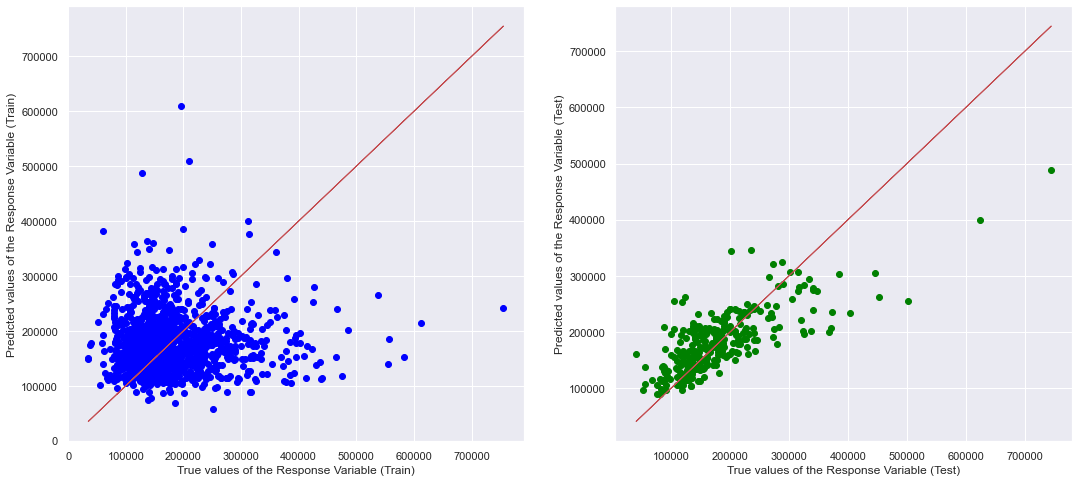

In [158]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)

axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)

axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

# MSE Observations - Is it too large to be acurate?

### RMSE of the test set is 55861, which means that the predicted sale price value can have an error of around 55000. This quite a large number since sale price is in the range of up to around 700k, and an error of 55k is considerably high especially for values that are smaller, such as houses with saleprice below 100k.

# Problem 2

In [40]:
bsmt = data[["TotalBsmtSF"]]
grg = data[["GarageArea"]]
grg.loc[grg.GarageArea == 0].count()

GarageArea    81
dtype: int64

Intercept of Regression 	: b =  [64486.1799213]
Coefficients of Regression 	: a =  [[109.57862111]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3647665868585419
Mean Squared Error (MSE) 	: 4138536928.156593

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4291054944061279
Mean Squared Error (MSE) 	: 3111702774.1522517



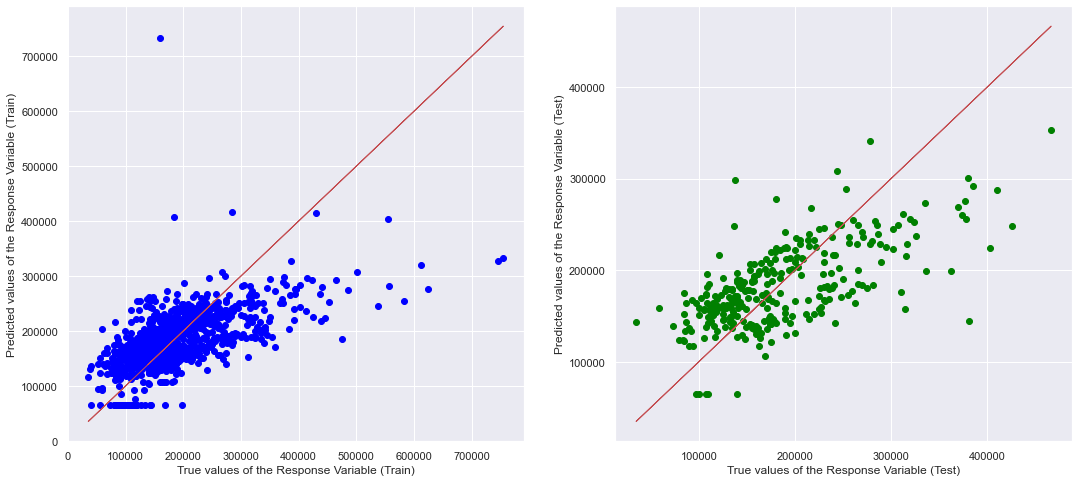

In [53]:
# BSMTSF

bsmt_train, bsmt_test, y1_train, y1_test = train_test_split(bsmt, y, test_size = 0.20)

# TRAINING SET

linreg.fit(bsmt_train, y1_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y1_train_pred = linreg.predict(bsmt_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(bsmt_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y1_train_pred))
print()

# TEST SET

y1_test_pred = linreg.predict(bsmt_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(bsmt_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y1_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].scatter(y1_train, y1_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 1)

axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y1_test, y1_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 1)

axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

Intercept of Regression 	: b =  [69636.78488046]
Coefficients of Regression 	: a =  [[235.33519093]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37778839914384077
Mean Squared Error (MSE) 	: 3965694094.0262628

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.43306960969827646
Mean Squared Error (MSE) 	: 3418083430.228677



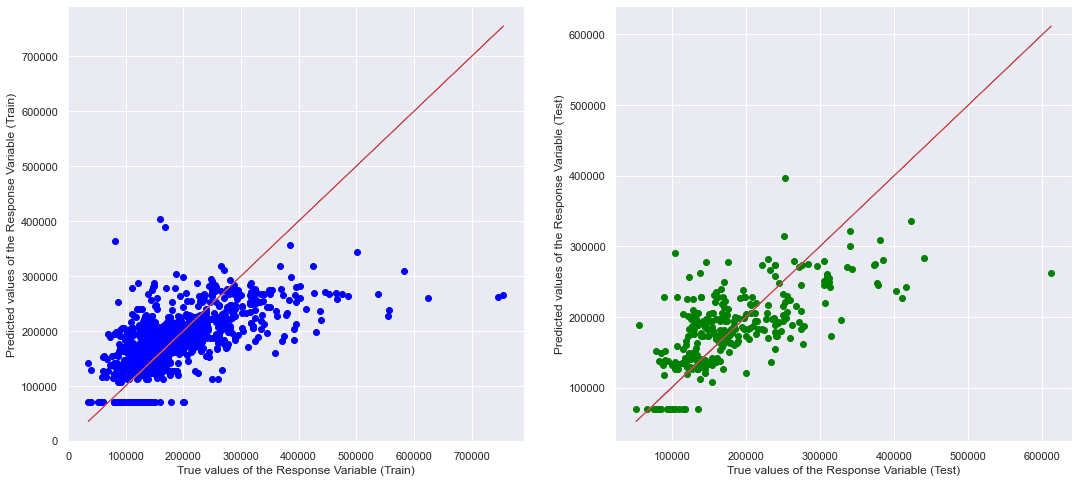

In [56]:
# GRG

grg_train, grg_test, y2_train, y2_test = train_test_split(grg, y, test_size = 0.20)

# TRAINING SET

linreg.fit(grg_train, y2_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y2_train_pred = linreg.predict(grg_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(grg_train, y2_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y2_train, y2_train_pred))
print()

# TEST SET

y2_test_pred = linreg.predict(grg_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(grg_test, y2_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y2_test, y2_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].scatter(y2_train, y2_train_pred, color = "blue")
axes[0].plot(y2_train, y2_train, 'r-', linewidth = 1)

axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y2_test, y2_test_pred, color = "green")
axes[1].plot(y2_test, y2_test, 'r-', linewidth = 1)

axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

# Ans:

Prediction of SalePrice using GrLivArea is better compared to the other 2.

For GrLivArea, the R^2 value of its prediction on the test set is 0.574 means that for the regression model of GrLivArea, the difference between the actual test data value and the predicted ones are generally smaller than that of the other two.

For GrLivArea, the MSE value of its prediction on the test set is 3 009 226 880, which is lower than that of the other two, where TotalBsmtSF's MSE is 3 111 702 774 and GarageArea's R^2 is 3 418 083 430. This means that the predicted value using the regression analysis of GrLivArea deviates lesser from the actual value of the test set data.

Hence, overall, GrLivArea is the better model for predicting sale price.

# Problem 3

In [66]:
combined_data = data[["GrLivArea", "SalePrice"]]
combined_data.isnull().sum()

GrLivArea    0
SalePrice    0
dtype: int64

<AxesSubplot:>

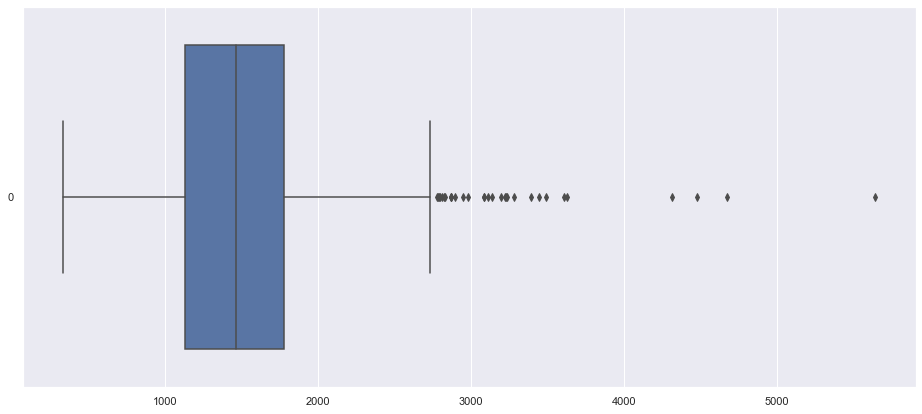

In [62]:
f = plt.figure(figsize=(16,7))
sb.boxplot(data = data["GrLivArea"] , orient = "h")


<AxesSubplot:>

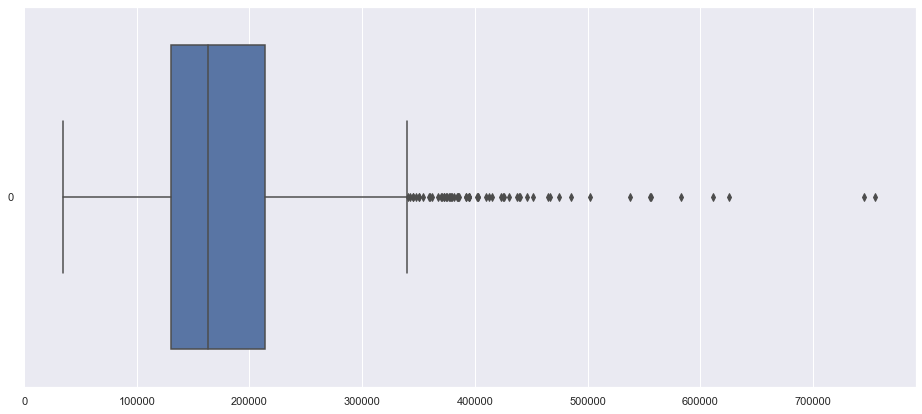

In [63]:
f = plt.figure(figsize=(16,7))

sb.boxplot(data = combined_data["SalePrice"] , orient = "h")

# Outliers calculation and removal

In [127]:
Q1 = combined_data.quantile(0.25)
Q3 = combined_data.quantile(0.75)
IQR = Q3 - Q1
print("The number of outliers are:")
((combined_data < (Q1 - 1.5 * IQR)) | (combined_data > (Q3 + 1.5 * IQR))).sum()

The number of outliers are:


GrLivArea     8
SalePrice    37
dtype: int64

In [128]:
for name_var in ['GrLivArea']:
    q75,q25 = np.percentile(combined_data.loc[:,name_var],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    combined_data.loc[combined_data[name_var] < min,name_var] = np.nan
    combined_data.loc[combined_data[name_var] > max,name_var] = np.nan
    
for name_var in ['SalePrice']:
    q75,q25 = np.percentile(combined_data.loc[:,name_var],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    combined_data.loc[combined_data[name_var] < min,name_var] = np.nan
    combined_data.loc[combined_data[name_var] > max,name_var] = np.nan
    
combined_data.isnull().sum()

GrLivArea     8
SalePrice    37
dtype: int64

In [129]:
combined_data = combined_data.dropna(axis = 0)
combined_data.isnull().sum()

GrLivArea    0
SalePrice    0
dtype: int64

In [136]:
print(combined_data.shape)

grliv = combined_data[['GrLivArea']]
sale = combined_data[['SalePrice']]

(1340, 2)


In [137]:
# Split the Dataset into Train and Test randomly
gr_train, gr_test, sale_train, sale_test = train_test_split(grliv, sale, test_size = 0.20)

linreg.fit(gr_train, sale_train)

print("gr_train shape :", gr_train.shape)
print("sale_train shape :", sale_train.shape)
print("gr_test shape :", gr_test.shape)
print("sale_test shape :", sale_test.shape)

gr_train shape : (1072, 1)
sale_train shape : (1072, 1)
gr_test shape : (268, 1)
sale_test shape : (268, 1)


Intercept of Regression 	: b =  [43377.8703016]
Coefficients of Regression 	: a =  [[84.55900303]]


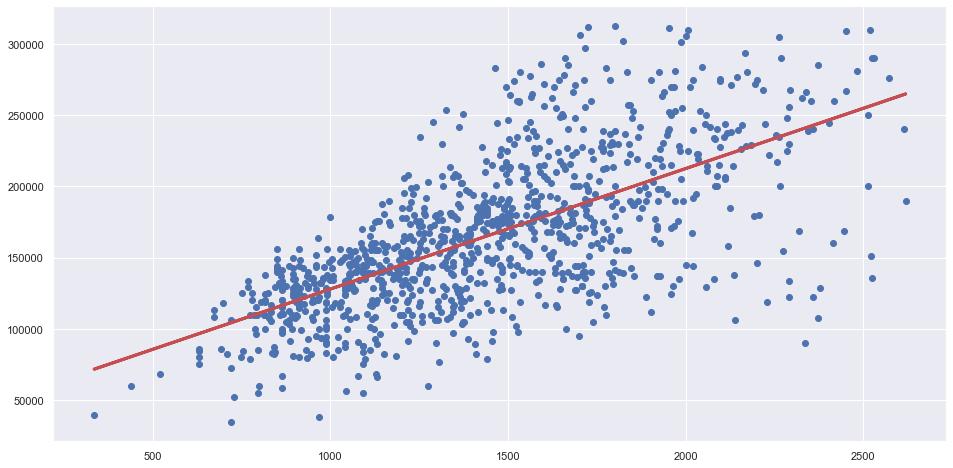

In [138]:
# Formula for the Regression line

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

regline_gr = gr_train
regline_sale = linreg.intercept_ + linreg.coef_ * gr_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_train, sale_train)
plt.plot(regline_gr, regline_sale, 'r-', linewidth = 3)
plt.show()

In [139]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(gr_train, sale_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(regline_gr, regline_sale))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4370575223622537
Mean Squared Error (MSE) 	: 27844887228.541695



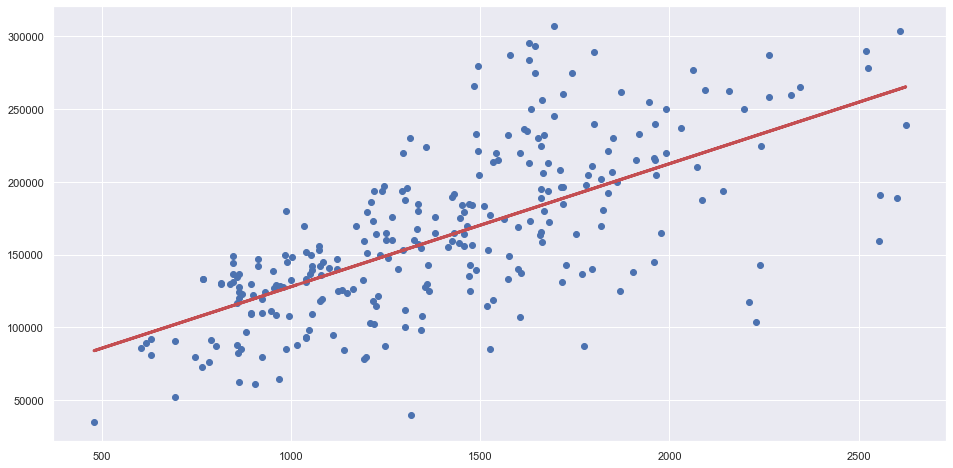

In [147]:
sale_test_pred = linreg.predict(gr_test)


regline_gr_pred = gr_test
regline_sale_pred = linreg.intercept_ + linreg.coef_ * gr_test

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_test, sale_test)
plt.plot(regline_gr_pred, regline_sale_pred, 'r-', linewidth = 3)
plt.show()


In [159]:
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(gr_test, sale_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(regline_gr_pred, regline_sale_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4436622847020959
Mean Squared Error (MSE) 	: 27199858814.553143



# Ans:

### The model with the outlier-free set may not be better than the previous model in problem 1. For the R^2 value from problem 1 of the test set, the value is 0.574 which is closer to 1 than the R^2 value of the new model, which is 0.466. Also, the MSE is from problem 1 is 3 009 226 880, and the new model's MSE is 27 199 858 814. This shows that problem 1's model is still likely to be better in preditcting saleprice more accurately. This is likely because of the decrease in data for the new model, which means the regression model has lesser data to learn from and hence have a less accurate predicion.